In [83]:
#  importações para tratamentos de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [84]:
# Imports para ML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [101]:
dataset = "dataset/dados_para_modelo.csv"
df = pd.read_csv(dataset, encoding='utf-8',sep=";")

df2 = df[0:5000]


In [102]:
df2.head()

,left,top,botton,rigth
0,0,0,0,332
1,0,0,0,337
2,0,5,0,342
3,0,10,0,347
4,0,15,0,352


In [103]:
X= df2.drop(['rigth'],axis=1)
y = df2.rigth

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [113]:
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.coef_

array([ 0.73246325,  0.03093449, -0.16855319])

In [114]:
X_train

,left,top,botton
3000,405,295,425
1191,485,295,400
4964,585,295,320
10765,405,220,305
8287,710,295,400
...,...,...,...
599,405,145,305
5695,405,60,305
8006,585,50,305
1361,405,295,410


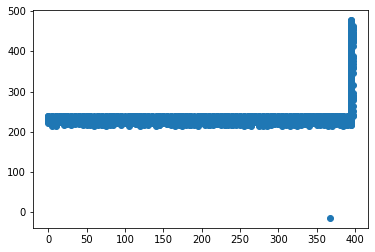

In [115]:
predict = lm.predict(X_test)
plt.scatter(y_test,predict);

In [116]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 86.88728590805592
MSE: 10920.739511605623
RMSE: 104.5023421345456


### testar predições 

In [117]:
lst_nome_colunas=['left','top','botton','rigth']

In [118]:
def convert_list_to_dataframe(lst, lst_colunas):
    # converter a list com os dados para predição em dataframe
    return pd.DataFrame(np.array(lst).reshape(1, 3), columns=lst_colunas[:-1])

In [119]:
lst=convert_list_to_dataframe([405.0,90.0,305.0],lst_nome_colunas)

lst_predict = lm.predict(lst)
int(lst_predict[0])

233